# Cell 0 – Setup and Load Data
 This cell sets up the required packages and loads the preprocessed user-level
 data from 
 user_features_expanded.csv .
 We ensure correct paths and create a directory to store EDA visuals if it doesn’t
 exist.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 🎨 Setup plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 📁 Define file paths
project_root = Path.cwd().parent
data_path = project_root / "data" / "processed" / "user_features_expanded.csv"  # ✅ Corrected
output_path = project_root / "outputs" / "eda_visuals"
output_path.mkdir(parents=True, exist_ok=True)

# 📥 Load dataset
df = pd.read_csv(data_path)
print("✅ Data loaded:", df.shape)

# ✅ Map churn values to readable labels
df["user_status"] = df["churned"].map({0: "Retained", 1: "Churned"})

# 👀 Preview
df.head()


✅ Data loaded: (2580, 14)


,user_id,avg_time,total_time,session_count,first_day,last_day,active_days,churned,session_type_lesson,session_type_practice,session_type_test,client_android,client_web,client_ios,user_status
0,++j955YG,9.407895,1430,152,0.004,13.102,[4.0000e-03 1.0590e+00 1.0630e+00 1.0650e+00 1...,0,131.0,21.0,0.0,142.0,10.0,0.0,Retained
1,+/iDvu/I,9.309973,3454,371,0.369,12.905,[ 0.369 0.371 0.379 2.315 2.317 2.319 2....,1,328.0,43.0,0.0,371.0,0.0,0.0,Churned
2,+0UEF02n,12.648649,1404,111,0.006,1.443,[0.006 0.01 0.015 0.019 0.029 0.032 0.039 0.1...,1,107.0,4.0,0.0,0.0,0.0,111.0,Churned
3,+197nchq,17.761468,1936,109,0.023,13.013,[ 0.023 1.026 1.046 1.88 1.885 1.894 3....,0,107.0,2.0,0.0,109.0,0.0,0.0,Retained
4,+7lbKZrn,10.307339,2247,218,0.469,13.451,[ 0.469 1.414 1.418 1.422 1.491 1.494 1....,0,122.0,96.0,0.0,218.0,0.0,0.0,Retained


 ## Cell 1 – Churn Distribution
  A bar chart showing the number of users who churned vs. those who didn’t.
  This is a foundational visual to understand class imbalance, which affects model
  performance.

C:\Users\poono\AppData\Local\Temp\ipykernel_8376\2307994053.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="user_status", data=df, palette="Set2")


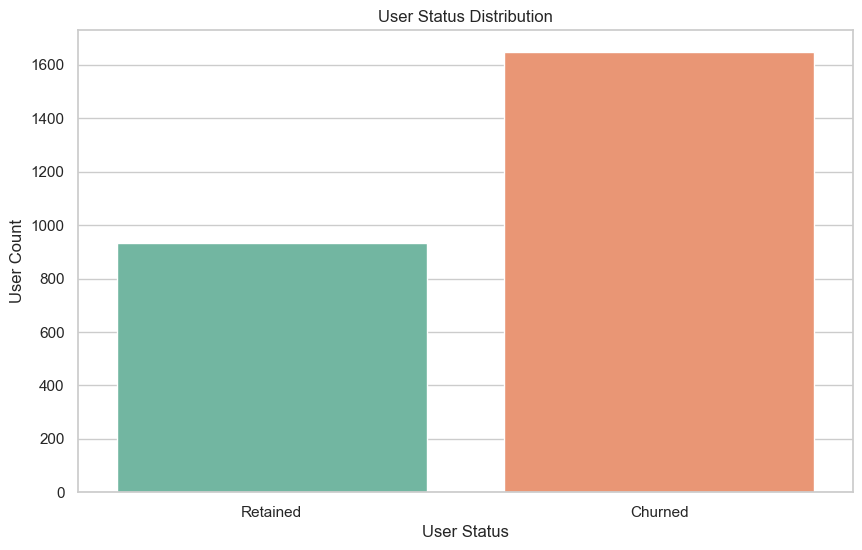

In [35]:
ax = sns.countplot(x="user_status", data=df, palette="Set2")
plt.title("User Status Distribution")
plt.xlabel("User Status")
plt.ylabel("User Count")
plt.savefig(output_path / "user_status_distribution.png")
plt.show()


## Cell 2 – Average Session Time vs Churn
 This box plot shows the distribution of 
 avg_time across churned vs. retained
 users.
 We want to investigate if session engagement correlates with churn behavior

C:\Users\poono\AppData\Local\Temp\ipykernel_8376\3907381093.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="user_status", y="avg_time", data=df, palette="Set3")


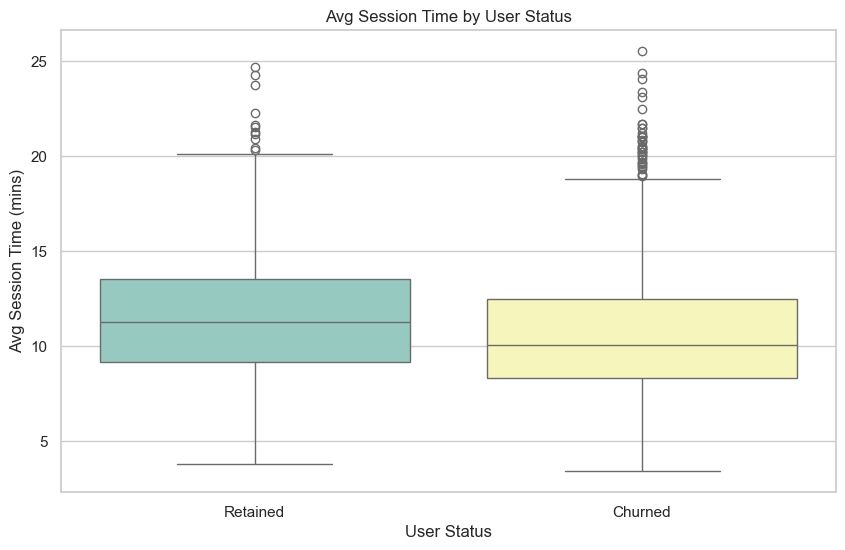

In [36]:
sns.boxplot(x="user_status", y="avg_time", data=df, palette="Set3")
plt.title("Avg Session Time by User Status")
plt.xlabel("User Status")
plt.ylabel("Avg Session Time (mins)")
plt.savefig(output_path / "avg_time_vs_user_status.png")
plt.show()


## Cell 3 – Total Time Spent vs Churn
 Similar to average time, this shows whether churned users spend less total time
 on the app.
 Outliers are expected — but the median and IQRs reveal user patterns.

C:\Users\poono\AppData\Local\Temp\ipykernel_8376\3929263289.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="user_status", y="total_time", data=df, palette="coolwarm")


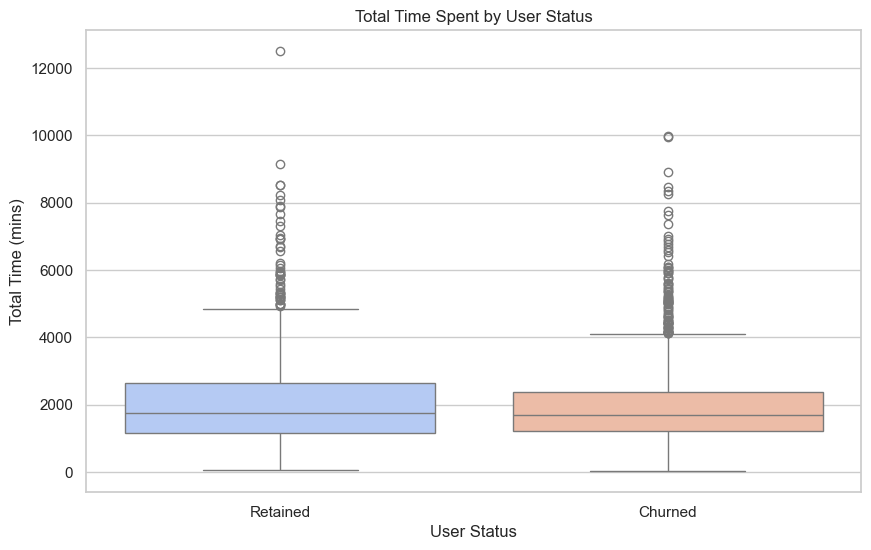

In [37]:
sns.boxplot(x="user_status", y="total_time", data=df, palette="coolwarm")
plt.title("Total Time Spent by User Status")
plt.xlabel("User Status")
plt.ylabel("Total Time (mins)")
plt.savefig(output_path / "total_time_vs_user_status.png")
plt.show()


## Cell 4 – Session Count vs Churn
 This chart shows how the number of sessions (frequency) differs between
 churned and non-churned users.
 Fewer sessions may correlate with churn.

C:\Users\poono\AppData\Local\Temp\ipykernel_8376\689387952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="user_status", y="session_count", data=df, palette="muted")


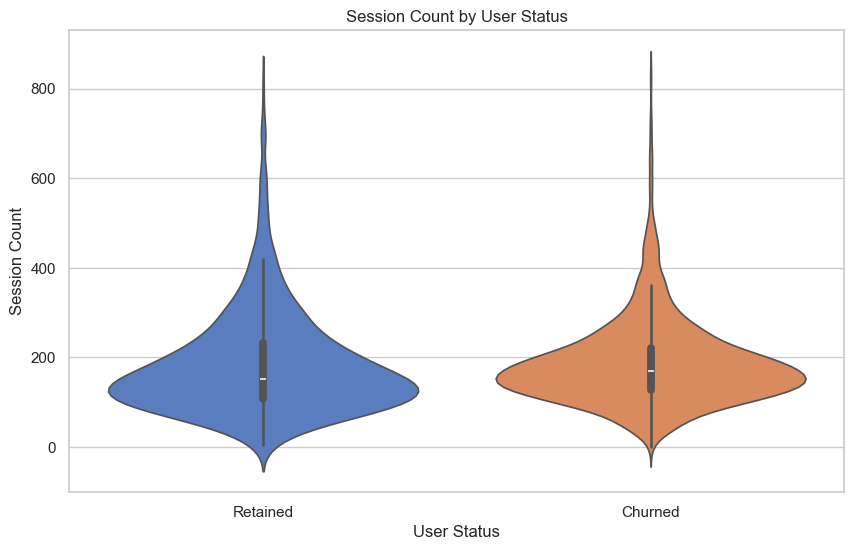

In [38]:
# Violin plot using user_status
sns.violinplot(x="user_status", y="session_count", data=df, palette="muted")
plt.title("Session Count by User Status")
plt.xlabel("User Status")
plt.ylabel("Session Count")
plt.savefig(output_path / "session_count_vs_user_status.png")
plt.show()

## Cell 5 – Session Type Patterns by Churn

A grouped bar chart showing average usage of different session types  
(`lesson`, `practice`, `test`) across churned and retained users.  
This helps identify learning activity patterns tied to churn.


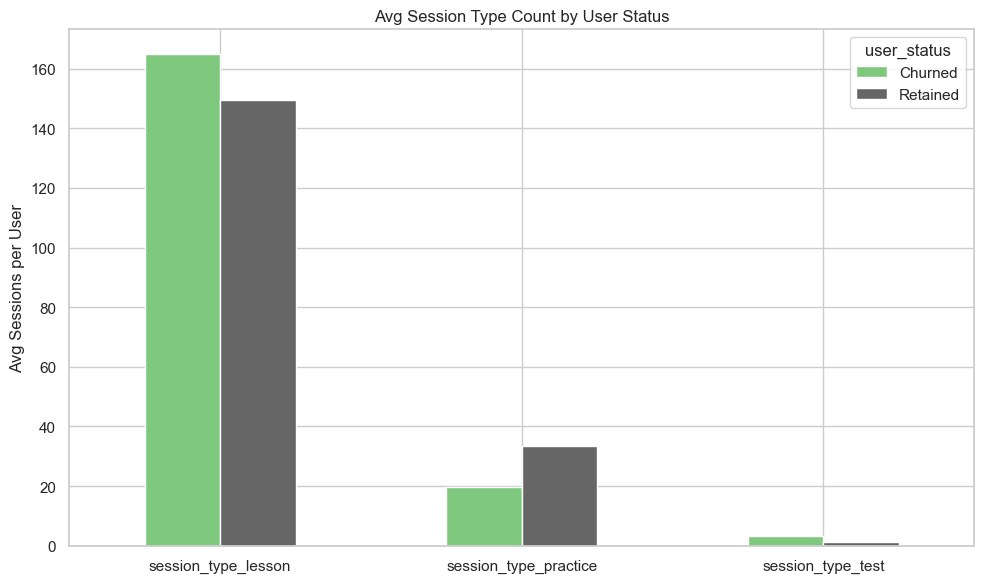

In [39]:
# Define session type columns
session_cols = ["session_type_lesson", "session_type_practice", "session_type_test"]

# Compute average session type usage by user status
session_means = df.groupby("user_status")[session_cols].mean().T

# Plot grouped bar chart
session_means.plot(kind="bar", colormap="Accent")
plt.title("Avg Session Type Count by User Status")
plt.ylabel("Avg Sessions per User")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(output_path / "session_type_vs_user_status.png")
plt.show()


## Cell 6 – Device/Client Usage by Churn
 This bar chart compares the average usage of each platform (Android, Web, iOS)
 across churned and retained users.
 Device preference may indicate usability or experience factors tied to churn.

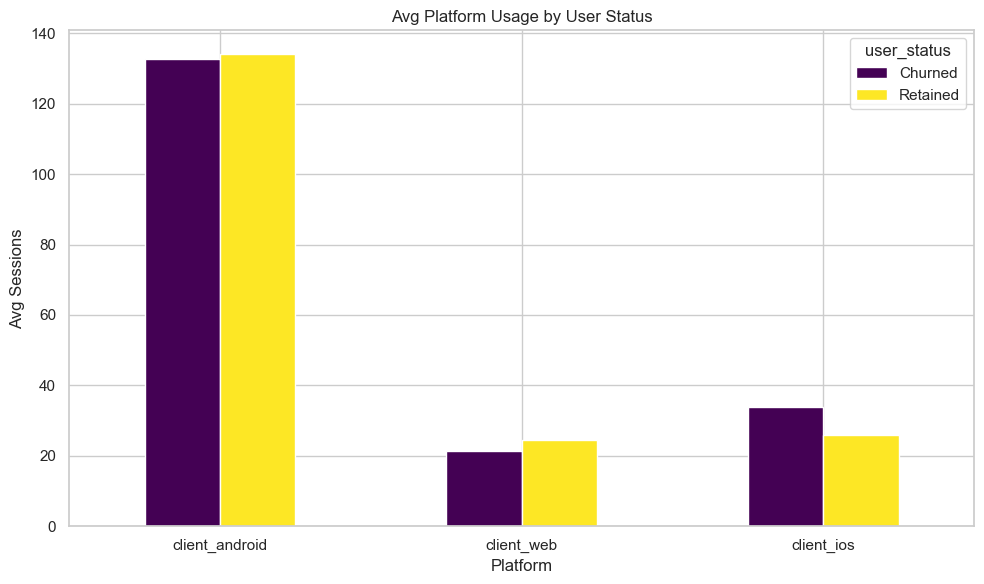

In [40]:
# Define client columns
client_cols = ["client_android", "client_web", "client_ios"]

# Group by human-readable status
client_means = df.groupby("user_status")[client_cols].mean().T

# Plot
client_means.plot(kind="bar", colormap="viridis")
plt.title("Avg Platform Usage by User Status")
plt.ylabel("Avg Sessions")
plt.xlabel("Platform")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(output_path / "client_usage_vs_user_status.png")
plt.show()


 # Cell 7 -  Feature Correlations: 
  - Strong correlation between total_time and session_count
  - First and last day activity patterns differ for churned users
  

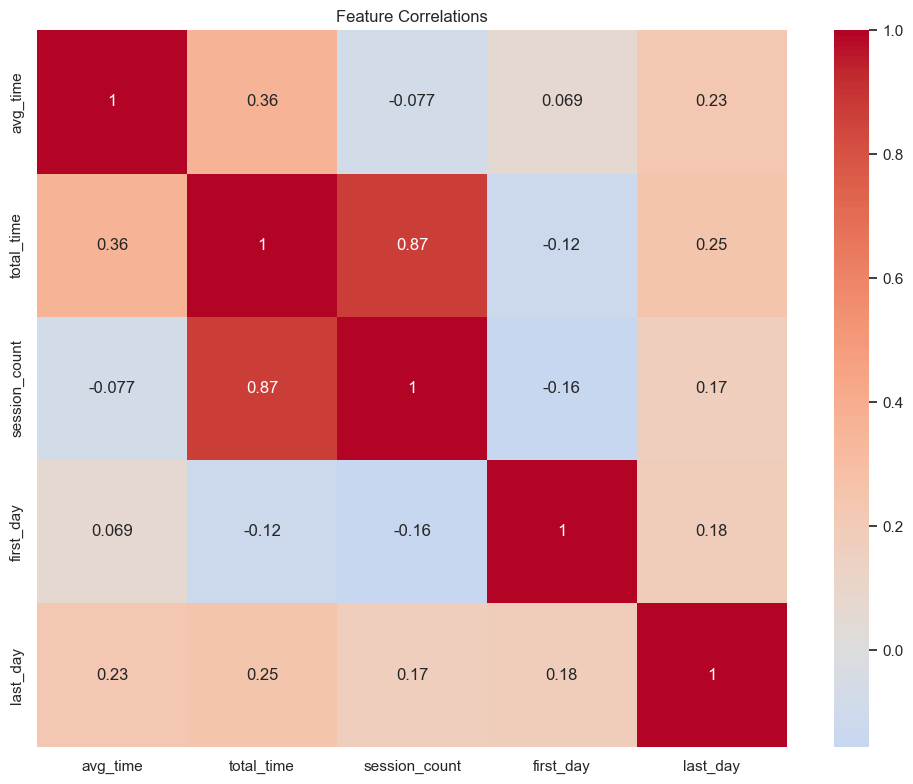

In [41]:
# Select numeric columns for correlation analysis
numeric_cols = ['avg_time', 'total_time', 'session_count', 'first_day', 'last_day']

# Create correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.tight_layout()
plt.savefig(output_path / "correlation_heatmap.png")
plt.show()

# Cell 8 - Early Behavior: 
  - First day engagement strongly indicates future churn probability
  - Platform choice in first sessions may predict retention

C:\Users\poono\AppData\Local\Temp\ipykernel_8376\2513402650.py:22: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\poono\AppData\Local\Temp\ipykernel_8376\2513402650.py:23: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.savefig(output_path / "enhanced_activity_pattern.png")
f:\Bachleros Research\Rsearch thesis\New folder\Predicting-Churn-using-ML-and-DL\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


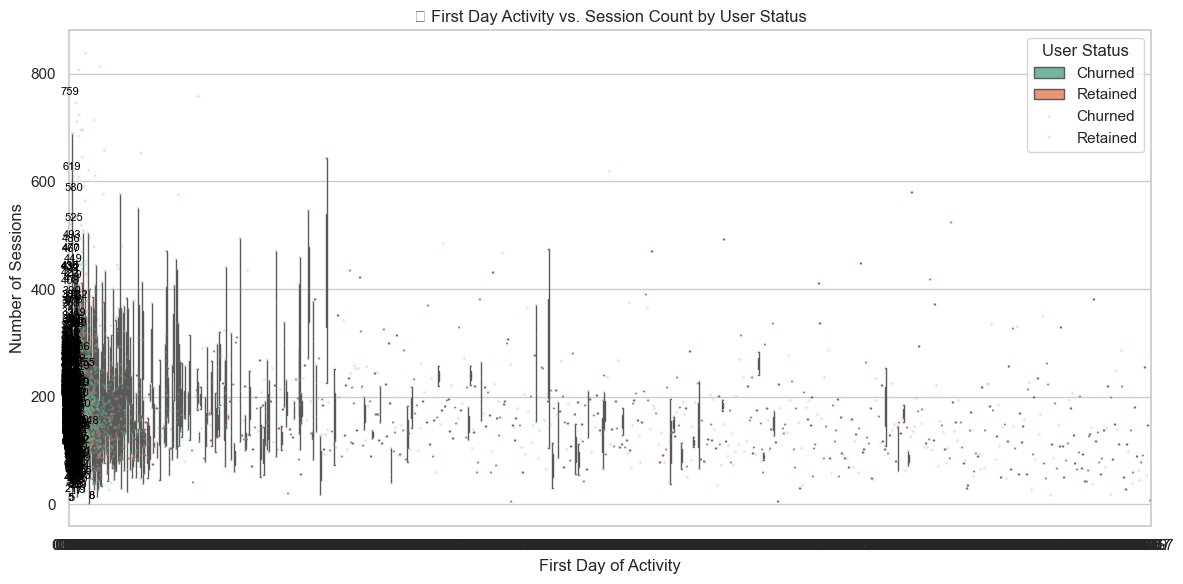

In [42]:
plt.figure(figsize=(12, 6))

# 🎻 Boxplot for distribution
sns.boxplot(data=df, x='first_day', y='session_count', hue='user_status', palette="Set2", fliersize=0)

# 🌧️ Optional: add stripplot for raw data points
sns.stripplot(data=df, x='first_day', y='session_count', hue='user_status', 
              dodge=True, palette="Set2", alpha=0.3, size=2, jitter=0.25, marker='o')

# 🎯 Annotate median session counts per day
medians = df.groupby(['first_day', 'user_status'])['session_count'].median().reset_index()
for _, row in medians.iterrows():
    plt.text(x=row['first_day'], y=row['session_count'] + 1.5, 
             s=f"{int(row['session_count'])}", 
             horizontalalignment='center', color='black', fontsize=8)

# 🏷️ Titles and labels
plt.title('📅 First Day Activity vs. Session Count by User Status')
plt.xlabel('First Day of Activity')
plt.ylabel('Number of Sessions')
plt.legend(title="User Status", loc="upper right")
plt.tight_layout()
plt.savefig(output_path / "enhanced_activity_pattern.png")
plt.show()


## 📊 EDA Summary

This notebook explores early user behavior to uncover churn patterns.

### 🔍 Key Insights
- **Class Imbalance:** More retained than churned users — important for model fairness.
- **Engagement:** Churned users show lower avg time, total time, and session count.
- **Session Types:** Retained users engage more in diverse learning activities.
- **Platform Use:** Device usage varies slightly by churn status; Android dominates overall.
- **Temporal Patterns:** First-day activity is a strong churn signal.
- **Correlations:** Total time and session count are strongly linked.

### 📁 Outputs
Visuals saved in: `outputs/eda_visuals/`  
Data from: `data/processed/user_features_expanded.csv`
